### Projeto DIO - Conversor de imagem colorida para cinza e binarizada

In [15]:
!pip install Pillow

**Carregamento da Imagem**

Este bloco se encarrega de abrir o arquivo de imagem, verificar se ele existe, e extrai os dados brutos de pixel (RGB) em uma lista para que o algoritmo possa usá-lo.

In [16]:
from PIL import Image
import os
from IPython.display import display

image_name = 'monalisa.png'

try:
    if not os.path.exists(image_name):
        print(f"the image '{image_name}' was not found")
        print("Make sure you upload the file to Colab before running")
        exit()

    color_image = Image.open(image_name)
    color_image = color_image.convert('RGB')

    width, height = color_image.size
    colored_pixels = list(color_image.getdata())

    print(f"Image '{image_name}' successfully uploaded.")
    print(f"Dimensions {width} x {height} pixels")

except:
    print(f"An error occurred while loading the image: {e}")
    exit()

Image 'monalisa.png' successfully uploaded.
Dimensions 800 x 450 pixels


**Algoritmo de Tons de Cinza**

Esta é a primeira implementação onde o código percorre cada pixel colorido, aplica a fórmula de média ponderada e armazena o novo valor de cinza em uma lista separada.

In [17]:
gray_pixel = []
for pixel in colored_pixels:
    r, g, b = pixel
    gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
    gray_pixel.append(gray_value)

print("\nGrayscale Conversion")
if gray_pixel:
    print("Grayscale processing complete.")
    print(f"First 5 pixels of gray: {gray_pixel[:5]}")
else:
    print("Error: The list of grayed-out pixels is empty.")


Grayscale Conversion
Grayscale processing complete.
First 5 pixels of gray: [152, 150, 145, 144, 146]


**Algoritmo de Binarização**

Esta é a segunda implementação onde o código percorre a lista de pixels em cinza, compara cada valor com um limiar (threshold) e decide se o pixel será preto (0) ou branco (255).

In [18]:
binarized_pixels = []
threshold = 127
for gray_value in gray_pixel:
    if gray_value < threshold:
        binarized_pixels.append(0)
    else:
        binarized_pixels.append(255)

print("\nImage Binarization")
if binarized_pixels:
    print("Binarization processing completed.")
    print(f"First 5 binarized pixels: {binarized_pixels[:5]}")
else:
    print("Error: The list of binarized pixels is empty.")


Image Binarization
Binarization processing completed.
First 5 binarized pixels: [255, 255, 255, 255, 255]


**Salvamento**

Nesta parte, a biblioteca Pillow é usada para criar novos arquivos de imagem a partir das listas de pixels geradas, salvando no disco do Colab.

In [19]:
try:
    # Save the image in grayscale
    gray_final_image = Image.new('L', (width, height))
    gray_final_image.putdata(gray_pixel)
    gray_final_image.save('gray_monalisa.png')

    # Save the binarized image
    binary_final_image = Image.new('L', (width, height))
    binary_final_image.putdata(binarized_pixels)
    binary_final_image.save('binarized_monalisa.png')

    print("\nProcessing completed successfully!")
    print("The new images have been saved, check the left panel of the colab.")

except Exception as e:
    print(f"An error occurred while saving the images: {e}")


Processing completed successfully!
The new images have been saved, check the left panel of the colab.


**Exibição das Imagens**

Esta parte finaliza o projeto mostrando visualmente os resultados diretamente na saída do notebook. As imagens colorida, em tons de cinza e binarizada são exibidas.

Original Image


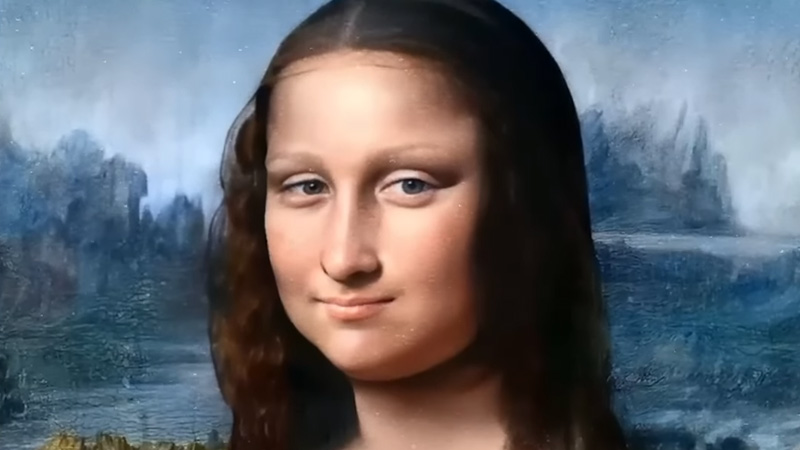


Grayscale Image


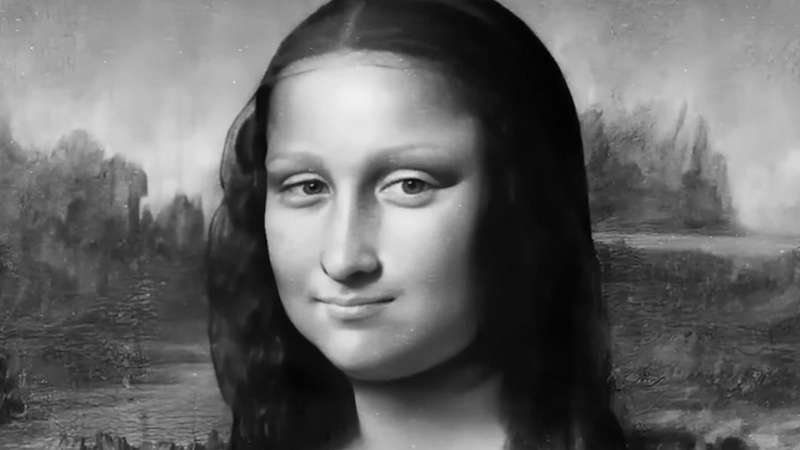


Binarized Image


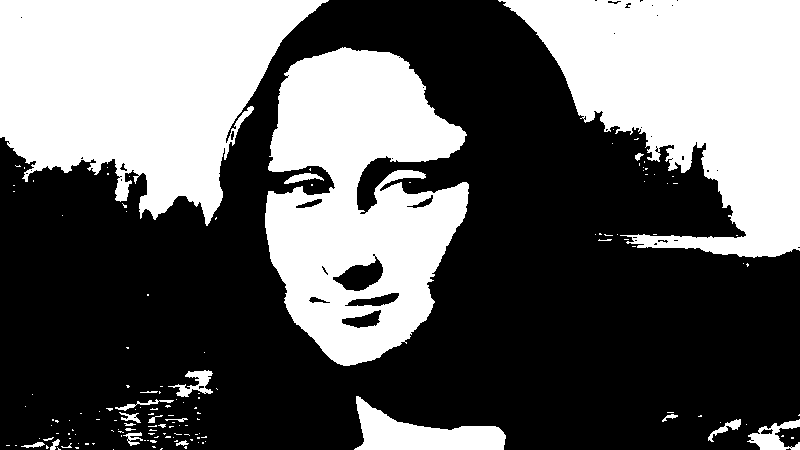

In [20]:
print("Original Image")
display(color_image)


print("\nGrayscale Image")
display(gray_final_image)


print("\nBinarized Image")
display(binary_final_image)